Context for decision to recognize guides with RS3 Seq+Target (Chen) >=0.2 as active 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gpplot 

gpplot.set_aesthetics()

In [2]:
z_scored_guides_deweirdt2022_tiling=pd.read_csv("../Data/rs3valdata_updatedmappings_zscore.csv")
#essential genes identified from Hart 2015
essential_genes = pd.read_csv("../Data/AchillesCommonEssentialControls.csv")
essential_genes["Gene"]=essential_genes["Gene"].apply(lambda x: x.split("(")[0])
#remove space from gene name 
essential_genes["Gene"]=essential_genes["Gene"].str.replace(" ","")
essential_gene_list=essential_genes["Gene"].tolist()
essential_zscores=z_scored_guides_deweirdt2022_tiling[z_scored_guides_deweirdt2022_tiling["On-target Gene Symbols"].isin(essential_gene_list)]

In [4]:
data_with_rs3scores= pd.read_excel("../Data/deweirdt_2022_suppdata4.xlsx",sheet_name="Library annotation")
essential_zscores["Target Gene Symbol"]=essential_zscores["On-target Gene Symbols"]
essential=essential_zscores.merge(data_with_rs3scores,on=["sgRNA Sequence","Target Gene Symbol"])
essential

/var/folders/nm/6_wl7tx50tq5bqfp8vzf4m6r0000gq/T/ipykernel_6260/2742696862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  essential_zscores["Target Gene Symbol"]=essential_zscores["On-target Gene Symbols"]


,Unnamed: 0,sgRNA Sequence,sgRNA_lfc,Target Sequence,On-target Gene Symbols,Notes,noness_targeting,z_scored_sgRNA_lfc,Target Gene Symbol,Target Gene ID,...,RS3 Sequence Score (Chen2013 tracr),AA Index,Transcript Base,Missing translation information,Missing conservation information,Target Score,RS3 Sequence (Hsu2013 tracr) + Target Score,RS3 Sequence (Chen2013 tracr) + Target Score,Low pDNA abundance,Category
0,2,AAAAAAAGGGAGGACCACTG,-0.717881,AAAAAAAGGGAGGACCACTG,WDR55,NaN,False,-2.316328,WDR55,ENSG00000120314,...,-0.061984,344.0,ENST00000358337,0.0,0.0,-0.039103,0.315736,-0.101086,No,Essential
1,3,AAAAAAAGGGCTGCCCCAAA,-0.537565,AAAAAAAGGGCTGCCCCAAA,TOP2A,NaN,False,-1.989108,TOP2A,ENSG00000131747,...,-0.851119,1438.0,ENST00000423485,0.0,0.0,-0.655955,-1.947747,-1.507074,No,Essential
2,4,AAAAAAAGTAGTGTGAAGTC,-0.790484,AAAAAAAGTAGTGTGAAGTC,LUC7L3,NaN,False,-2.448081,LUC7L3,ENSG00000108848,...,0.614224,392.0,ENST00000240304,0.0,0.0,-0.584693,-0.211536,0.029532,No,Essential
3,6,AAAAAACAAAAGTAGCGCAT,-1.117785,AAAAAACAAAAGTAGCGCAT,GET4,NaN,False,-3.042035,GET4,ENSG00000239857,...,0.146295,212.0,ENST00000265857,0.0,0.0,0.095575,0.138618,0.241870,No,Essential
4,7,AAAAAACAAAGAAGGCAATA,-1.395645,AAAAAACAAAGAAGGCAATA,SON,NaN,False,-3.546269,SON,ENSG00000159140,...,0.020599,2331.0,ENST00000356577,0.0,0.0,0.151114,-0.388048,0.171713,No,Essential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,84338,TTTGTTGCTGTTGCCGGCTC,0.062518,TTTGTTGCTGTTGCCGGCTC,BUD13,NaN,False,-0.900136,BUD13,ENSG00000137656,...,-1.301946,504.0,ENST00000260210,0.0,0.0,0.239109,-0.790085,-1.062837,No,Essential
31236,84339,TTTGTTGGCTGCATCCTGAC,-0.790552,TTTGTTGGCTGCATCCTGAC,NUP214,NaN,False,-2.448204,NUP214,ENSG00000126883,...,-0.902091,1895.0,ENST00000359428,0.0,0.0,-0.232791,-1.238454,-1.134881,No,Essential
31237,84340,TTTGTTGTATGATAAACATC,-1.194462,TTTGTTGTATGATAAACATC,UPF2,NaN,False,-3.181181,UPF2,ENSG00000151461,...,-0.696050,815.0,ENST00000356352,0.0,0.0,0.141191,-0.950558,-0.554858,No,Essential
31238,84342,TTTGTTTCTCAGGACCGCAT,-3.089690,TTTGTTTCTCAGGACCGCAT,DDB1,NaN,False,-6.620457,DDB1,ENSG00000167986,...,-0.079079,111.0,ENST00000680367,0.0,0.0,-0.026010,-0.206951,-0.105089,No,Essential


In [13]:
#obtaining % of guides that are effective with RS3 >0.2

#first excluding genes that overall do not demonstrate depletion 
avg_z_by_gene=pd.DataFrame(essential.groupby(["Target Gene Symbol"])["z_scored_sgRNA_lfc"].mean())
essential_genes_not_depleted= avg_z_by_gene[avg_z_by_gene["z_scored_sgRNA_lfc"]>-2].index.tolist()

essential_filt=essential[essential["Target Gene Symbol"].isin(essential_genes_not_depleted)==False].reset_index(drop=True)
essential_filt_goodRS3=essential_filt[essential_filt["RS3 Sequence (Chen2013 tracr) + Target Score"]>0.2].reset_index(drop=True)
print("% of guides with RS3 >0.2 that have z<-2:",round(100*len(essential_filt_goodRS3[essential_filt_goodRS3["z_scored_sgRNA_lfc"]<-2])/len(essential_filt_goodRS3),2))

% of guides with RS3 >0.2 that have z<-2: 92.3


In [8]:
total_n_nondepleted_guides=len(essential_filt[essential_filt["z_scored_sgRNA_lfc"]>-2])
n_nondepleted_guides_above_rs3_cutoff=len(essential_filt[(essential_filt["RS3 Sequence (Chen2013 tracr) + Target Score"]>0.2)&(essential_filt["z_scored_sgRNA_lfc"]>-2)])
print("% of inactive guides excluded by RS3 0.2 cutoff:",100* round(1-n_nondepleted_guides_above_rs3_cutoff/total_n_nondepleted_guides,3))

total_n_depleted_guides=len(essential_filt[essential_filt["z_scored_sgRNA_lfc"]<=-2])
n_depleted_guides_above_rs3_cutoff=len(essential_filt[(essential_filt["RS3 Sequence (Chen2013 tracr) + Target Score"]>0.2)&(essential_filt["z_scored_sgRNA_lfc"]<=-2)])
print("% of active guides excluded by RS3 0.2 cutoff:",100* round(1-n_depleted_guides_above_rs3_cutoff/total_n_depleted_guides,3))


% of inactive guides excluded by RS3 0.2 cutoff: 85.6
% of active guides excluded by RS3 0.2 cutoff: 55.800000000000004


RS3>0.2 filter exemplified on an essential gene

Text(0.5, 1.0, 'Guides tiling LARS2 (Essential), RS3 >0.2')

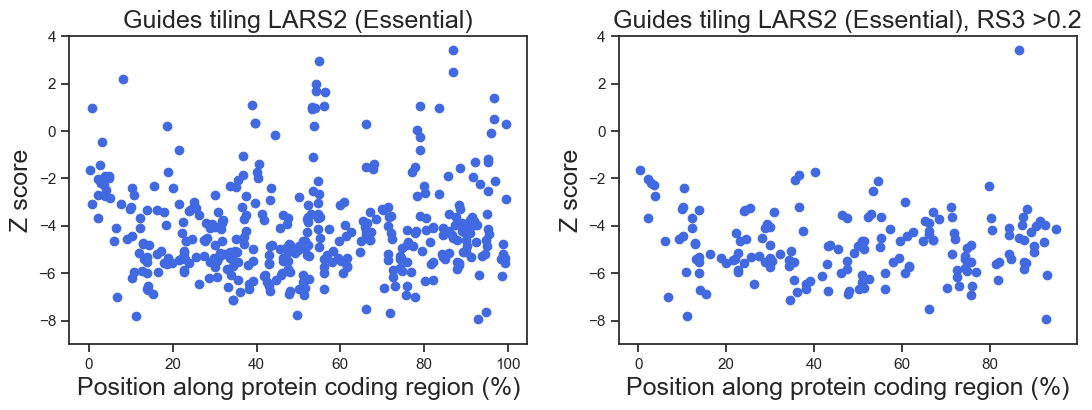

In [7]:
fig, ax = plt.subplots(1,2,figsize = (13, 4))

guides_targeting_LARS2= essential[essential["On-target Gene Symbols"]=="LARS2"]
ax[0].scatter(x=guides_targeting_LARS2["Target Cut %"],y=guides_targeting_LARS2["z_scored_sgRNA_lfc"],c="royalblue")
ax[0].set_xlabel("Position along protein coding region (%)",fontsize=18)
ax[0].set_ylabel("Z score",fontsize=18)
ax[0].set_ylim([-9,4])
ax[0].set_title("Guides tiling LARS2 (Essential)",fontsize=18)

guides_targeting_LARS2_effective=guides_targeting_LARS2[guides_targeting_LARS2["RS3 Sequence (Chen2013 tracr) + Target Score"]>0.2]
ax[1].scatter(x=guides_targeting_LARS2_effective["Target Cut %"],y=guides_targeting_LARS2_effective["z_scored_sgRNA_lfc"],c="royalblue")
ax[1].set_xlabel("Position along protein coding region (%)",fontsize=18)
ax[1].set_ylabel("Z score",fontsize=18)
ax[1].set_ylim([-9,4])
ax[1].set_title("Guides tiling LARS2 (Essential), RS3 >0.2",fontsize=18)